In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [25]:
data1=pd.read_csv("E:/Big Data/Data Set/delivery_time.csv")
data1.head(10)

Delivery Time  Sorting Time
0          21.00            10
1          13.50             4
2          19.75             6
3          24.00             9
4          29.00            10
5          15.35             6
6          19.00             7
7           9.50             3
8          17.90            10
9          18.75             9

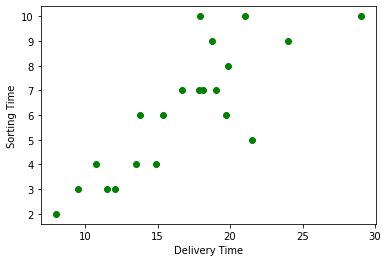

In [5]:
plt.scatter(data1["Delivery Time"] , data1["Sorting Time"] , color="green")
plt.xlabel("Delivery Time")
plt.ylabel("Sorting Time")
plt.show()

In [7]:
from sklearn import linear_model

In [8]:
train = data1[:(int((len(data)*0.8)))]
test = data1[(int((len(data)*0.8))):]

In [9]:
regr = linear_model.LinearRegression()
train_x = np.array(train[["Delivery Time"]])
train_y = np.array(train[["Sorting Time"]])
regr.fit(train_x,train_y)

LinearRegression()

In [10]:
print ("coefficients : ",regr.coef_) #Slope
print ("Intercept : ",regr.intercept_) #Intercept

coefficients :  [[0.44316423]]
Intercept :  [-1.13562274]


Text(0, 0.5, 'Sorting Time')

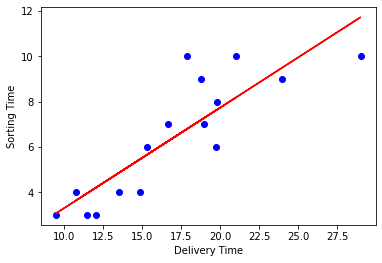

In [11]:
plt.scatter(train["Delivery Time"], train["Sorting Time"], color='blue')
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, color='red')
plt.xlabel("Delivery Time")
plt.ylabel("Sorting Time")

In [22]:
def get_regression_predictions(input_features,intercept,slope):
    predicted_values = input_features*slope + intercept
    return predicted_values

In [30]:
my_Delv_time = 20
estimatd_emission = get_regression_predictions(my_Delv_time,regr.intercept_[0],regr.coef_[0][0])
print ("Estimated Emission :",estimatd_emission)

Estimated Emission : 7.727661865210561


In [13]:
from sklearn.metrics import r2_score 
test_x = np.array(test[['Delivery Time']]) 
test_y = np.array(test[['Sorting Time']]) 
test_y_ = regr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Mean sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y)** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 1.04
Mean sum of squares (MSE): 2.57
R2-score: 0.39


In [ ]:
#Another 

In [32]:
data1.rename(columns = {'Delivery Time':'DeliveryTime'}, inplace = True)

In [33]:
data1.rename(columns = {'Sorting Time':'SortingTime'}, inplace = True)

(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <BarContainer object of 10 artists>)

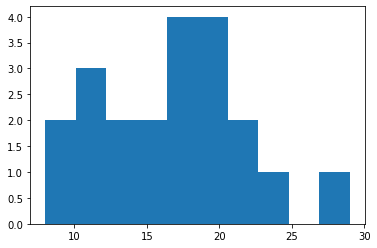

In [34]:
plt.hist(data1.DeliveryTime)

(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

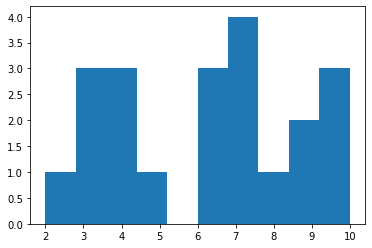

In [35]:
plt.hist(data1.SortingTime)

{'whiskers': [<matplotlib.lines.Line2D at 0x13c065280d0>,
 'caps': [<matplotlib.lines.Line2D at 0x13c06541d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x13c03a5a5e0>],
 'medians': [<matplotlib.lines.Line2D at 0x13c06547910>],
 'fliers': [<matplotlib.lines.Line2D at 0x13c0633c190>],
 'means': []}

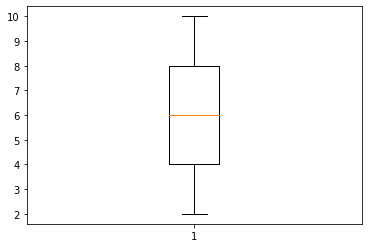

In [36]:
plt.boxplot(data1.SortingTime)

{'whiskers': [<matplotlib.lines.Line2D at 0x13c065c73a0>,
 'caps': [<matplotlib.lines.Line2D at 0x13c065c7a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x13c065c7040>],
 'medians': [<matplotlib.lines.Line2D at 0x13c065d3160>],
 'fliers': [<matplotlib.lines.Line2D at 0x13c065d34c0>],
 'means': []}

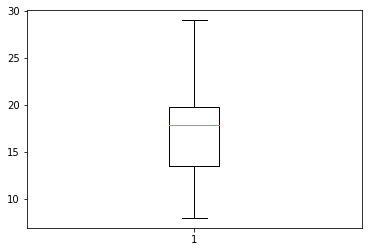

In [37]:
plt.boxplot(data1.DeliveryTime)

In [38]:
data1.DeliveryTime.corr(data1.SortingTime)

0.8259972607955326

In [ ]:
#based on corr relation is postive correlation 

In [39]:
import statsmodels.formula.api as smf
model=smf.ols("DeliveryTime~SortingTime",data=data1).fit()
model.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [40]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 04 Jul 2021   Prob (F-statistic):           3.98e-06
Time:                        20:00:40   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
SortingTime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
model.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [42]:
model.resid_pearson 

array([-0.70630355,  0.10943679,  1.11524837,  0.87774154,  2.01950985,
       -0.383949  ,  0.2978383 , -0.69160484, -1.76255624, -0.9110735 ,
        0.01877637, -0.82756157, -0.49264758, -0.0101515 ,  0.17043364,
        0.5796396 , -0.92911167, -0.00540844, -0.64082979, -0.10081191,
        2.27338512])